<a href="https://colab.research.google.com/github/TayyabKhan54/Machine-learning-project-/blob/main/machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn. metrics import mean_squared_error,r2_score

In [ ]:
dataset = pd.read_csv(r"/content/energydata_complete.csv")
dataset.head(5)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
dataset.isnull().sum()

,0
date,0
Appliances,0
lights,0
T1,0
RH_1,0
T2,0
RH_2,0
T3,0
RH_3,0
T4,0


In [ ]:
dataset.drop("date",axis=1)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
print(dataset.isnull().sum())

dataset = dataset.drop("date", axis=1)

dataset = dataset.fillna(dataset.mean())

dataset = dataset.astype(float)

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [ ]:
print("Dataset Shape:",dataset.shape)

print(dataset.describe())

Dataset Shape: (19735, 28)
         Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813     

In [ ]:
y = dataset["Appliances"]

x = dataset.drop("Appliances",axis=1)

In [ ]:
scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [ ]:
pca = PCA()

pca.fit(x_scaled)


PCA()

In [ ]:
print("Eigevalues")

print(pca.explained_variance_)

print("Explained variance ratio")
print(pca.explained_variance_ratio_)

Eigevalues
[9.32357409e+00 7.06312138e+00 2.00741170e+00 1.81285731e+00
 1.13623945e+00 1.04412348e+00 9.77946532e-01 8.39737483e-01
 5.57506369e-01 5.28430576e-01 3.88820242e-01 2.42590880e-01
 1.77516578e-01 1.43465393e-01 1.39538199e-01 1.17136285e-01
 1.11591648e-01 9.39452138e-02 7.23106687e-02 6.71533097e-02
 4.53784902e-02 4.19955771e-02 2.83870254e-02 2.25513586e-02
 1.43296070e-02 3.70935016e-03 0.00000000e+00]
Explained variance ratio
[3.45300061e-01 2.61583832e-01 7.43448143e-02 6.71394613e-02
 4.20808101e-02 3.86692805e-02 3.62184066e-02 3.10998123e-02
 2.06473378e-02 1.95705111e-02 1.44000200e-02 8.98439214e-03
 6.57435493e-03 5.31326383e-03 5.16781955e-03 4.33816108e-03
 4.13281457e-03 3.47927605e-03 2.67803721e-03 2.48703359e-03
 1.68059966e-03 1.55531293e-03 1.05131803e-03 8.35193183e-04
 5.30699293e-04 1.37376378e-04 0.00000000e+00]


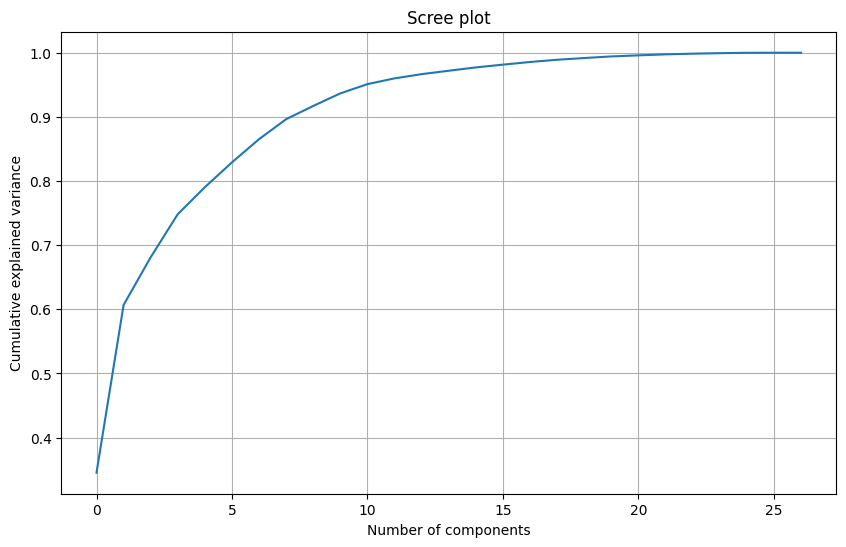

In [ ]:
plt.figure(figsize=(10,6))

plt.plot(np.cumsum(pca.explained_variance_ratio_))


plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Scree plot")

plt.grid()
plt.show()

In [ ]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >=0.95)+1

print("Number of components needed to explain 95% variance:",n_components)

Number of components needed to explain 95% variance: 11


In [ ]:
pca_final = PCA(n_components= n_components)
x_pca = pca_final.fit_transform(x_scaled)


print("Original Feature count:",x.shape[1])
print("Reduced feature count:",x_pca.shape[1])

Original Feature count: 27
Reduced feature count: 11


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2,random_state = 42)

In [ ]:
model = LinearRegression()

model.fit(x_train,y_train)

y_pred = model.predict(x_test)

rmse_before = np.sqrt(mean_squared_error(y_test,y_pred))

r2_before = r2_score(y_test,y_pred)


print("Before PCA :",rmse_before)
print("Before PCA -2:",r2_before)

Before PCA : 91.17482597600878
Before PCA -2: 0.16930416505473989


In [ ]:
x_train_pca,x_test_pca,y_train,y_test = train_test_split(x_pca,y,test_size=0.2,random_state=42)

model_pca = LinearRegression()

model_pca.fit(x_train_pca,y_train)

y_pred_pca = model_pca.predict(x_test_pca)


rmse_after = np.sqrt(mean_squared_error(y_test,y_pred))

r2_after = r2_score(y_test,y_pred)

print("After PCA:",rmse_after)
print("After PCA:",r2_after)



After PCA: 91.17482597600878
After PCA: 0.16930416505473989
